In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
file_path = '/kaggle/input/amazonsalesreport/Amazon Sale Report.csv'
data = pd.read_csv("C:\\Users\\Nishan Kamath\\Desktop\\3rd Year\\Projects\\Amazon-Sales-Analysis\\Amazon Sale Report.csv")
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [9]:
#summary of the data to know about the datatype and missing values

data_summary = data.describe(include='all')
data_info = data.info()
missing_values = data.isnull().sum()

print(data_summary, missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

# Order Status Distribution

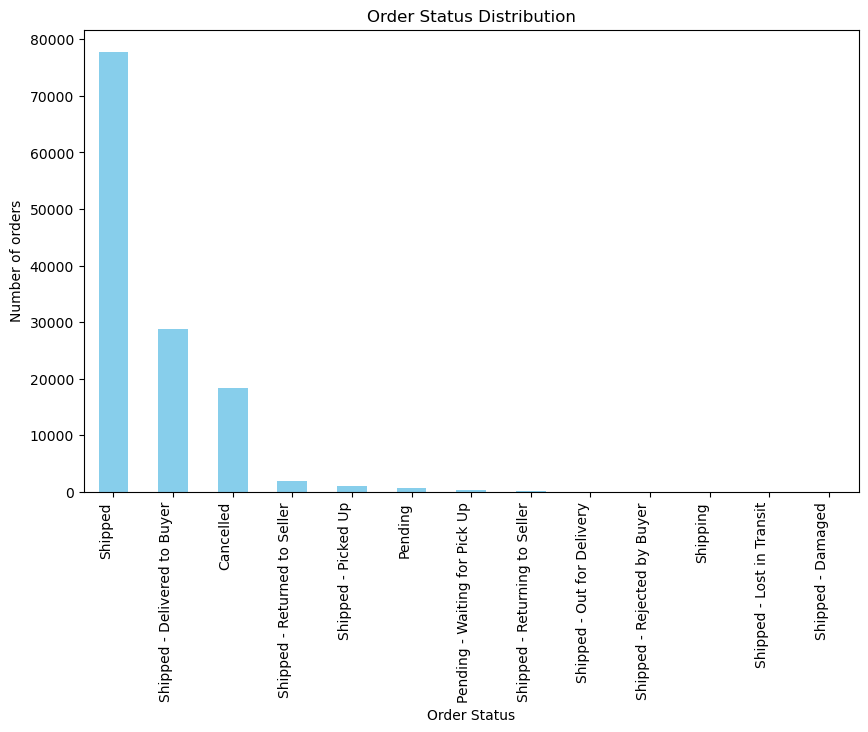

In [10]:
# visualizing order status distribution

plt.figure(figsize=(10,6))
data['Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of orders')
plt.xticks(rotation=90, ha='right')
plt.show()

- The majority of the orders have a status of "Shipped," indicating successful transactions.
- Other statuses like "Cancelled" and "Delivered to Buyer" are also significant, showing various stages of the order process.


# Fullfillment Method Distribution

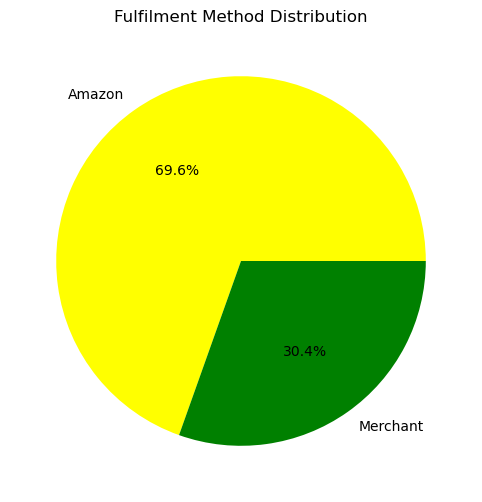

In [12]:
#visualizing Fulfilment Method distribution

plt.figure(figsize=(10,6))
data['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['yellow','green'])
plt.title('Fulfilment Method Distribution')
plt.ylabel('')
plt.show()

- piechart shows that a higher percentage of orders are fulfilled by Amazon compared to merchants, indicating a preference or reliance on Amazon's fullfillment services

# Amount Distribution

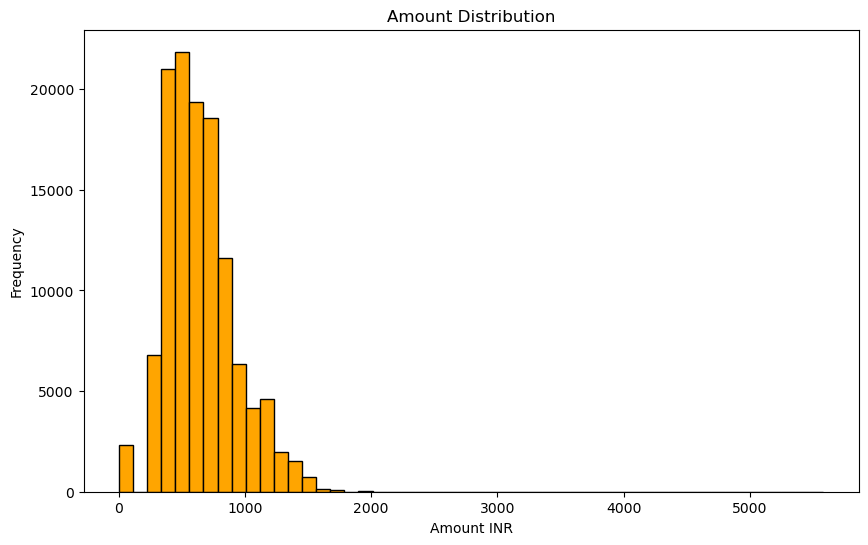

In [13]:
plt.figure(figsize=(10,6))
data['Amount'].dropna().plot(kind='hist', bins=50, color='orange', edgecolor='black')
plt.title('Amount Distribution')
plt.xlabel('Amount INR')
plt.ylabel('Frequency')
plt.show()

The histogram reveals that most orders are in the lower range , with a significant concentration around 500 to 1000 INR. This suggests that the majority of products sold are relatively low-cost items

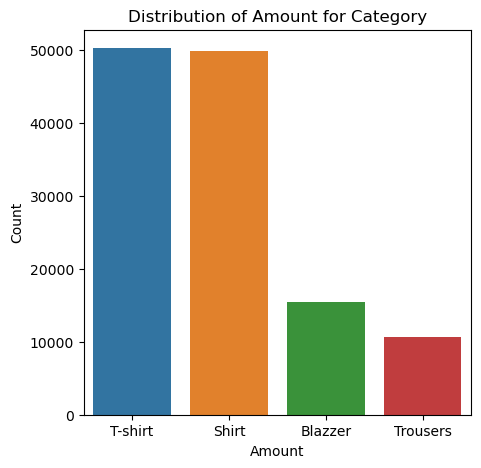

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='Category', order=['T-shirt','Shirt','Blazzer','Trousers'])
plt.title('Distribution of Amount for Category')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

According to the graph, the most sold item is T-shirt and least sold item is Trousers

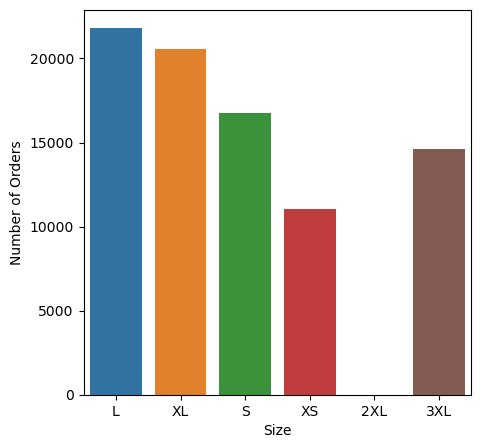

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='Size',order=['L','XL','S','XS','2XL','3XL'])
plt.xlabel('Size')
plt.ylabel('Number of Orders')
plt.show()

According to the graph most sold item is T-shirt size is Large also the least sold item is XS and zero sold is 2XL

# Top 10 Shipping States

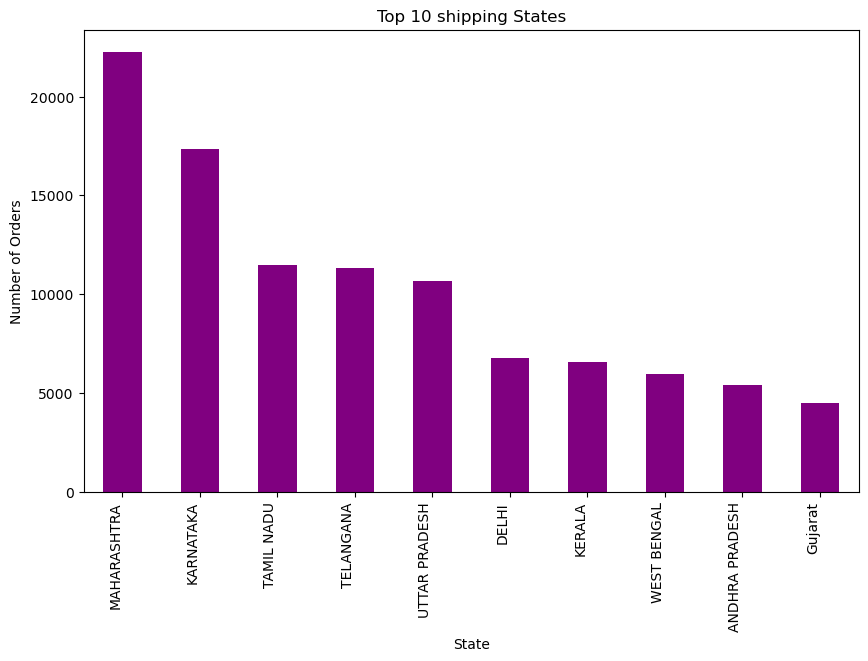

In [17]:
plt.figure(figsize=(10,6))
data['ship-state'].value_counts().head(10).plot(kind='bar',color='purple')
plt.title('Top 10 shipping States')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='right')
plt.show()

Maharastra, Karnataka, Tamilnadu are the top shipping destinations

# Treshhold for high-value orders

In [22]:
#consider orders above average of the Amount as high-value

high_value = data['Amount'].mean()

#filter the dataset to include only high-value orders
high_value_orders = data[data['Amount'] > high_value]
data.shape, high_value_orders.shape

((128976, 21), (53827, 21))

# Top 10 shipping states of high-value orders


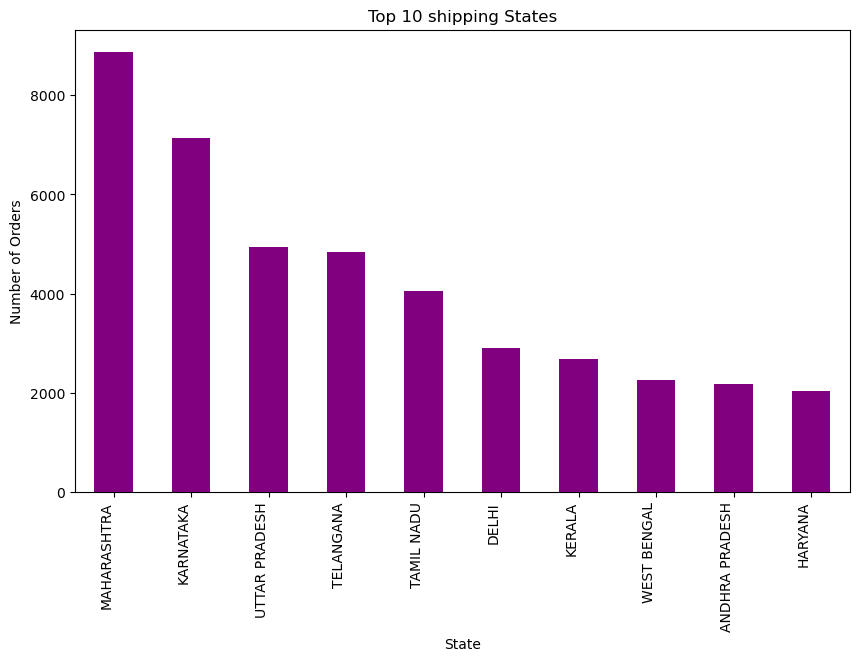

In [23]:
plt.figure(figsize=(10,6))
high_value_orders['ship-state'].value_counts().head(10).plot(kind='bar',color='purple')
plt.title('Top 10 shipping States')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='right')
plt.show()

# Different Shipping Methods

In [30]:
shipping_method_distribution = data['ship-service-level'].value_counts()
shipping_method_distribution['Expedited'].sum(),shipping_method_distribution['Standard'].sum()


(88630, 40346)

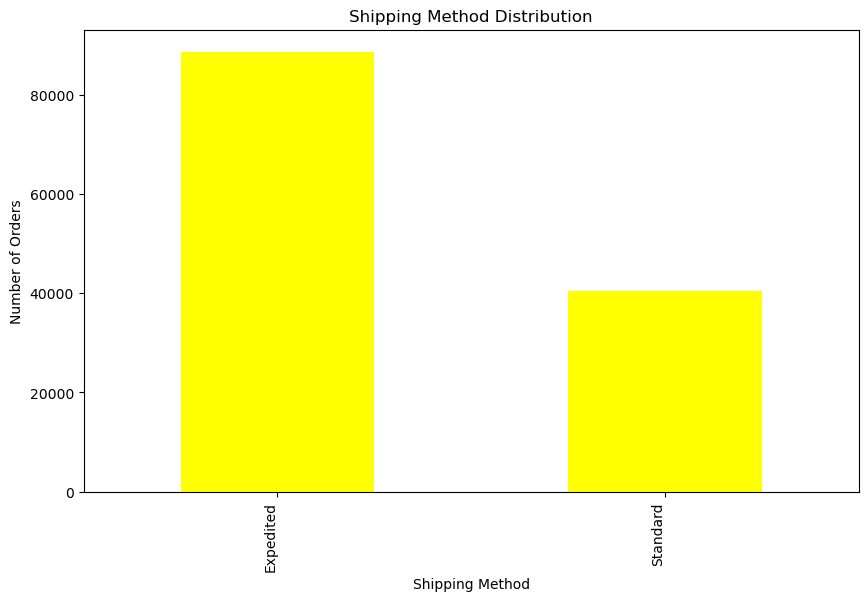

In [28]:
plt.figure(figsize=(10,6))
shipping_method_distribution.plot(kind='bar',color='yellow')
plt.title('Shipping Method Distribution')
plt.xlabel('Shipping Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90, ha='right')
plt.show()

- The majority of orders used the 'Expedited' shipping method, with 88,630 orders
- The 'Standard' shipping method was for 40346 orders